# Florence-2 by Microsoft
- [Florence-2: El modelo de vision GRATUITO de Microsoft (TUTORIAL)](https://youtu.be/X7UpAPEP8wI?si=VC_xIaArw_2AVsCK) by [Carlos Alarcon](https://www.youtube.com/@alarcon7a)
- Adapted by MRovai @8Oct24

**Key points about the [Florence-2 paper](https://arxiv.org/abs/2311.06242):**

1. Florence-2 is a new vision foundation model that aims to provide a unified representation for a variety of computer vision tasks.
2. It was developed by researchers at Microsoft and uses a sequence-to-sequence architecture with an image encoder and multi-modality encoder-decoder.
3. The model was trained on a new large-scale dataset called FLD-5B, containing 5.4 billion comprehensive visual annotations on 126 million images. This dataset was created using an iterative automated annotation process.
4. Florence-2 can perform tasks like object detection, captioning, visual grounding, and segmentation using just text prompts, without task-specific architectural modifications.
5. The model achieves strong zero-shot performance across various vision tasks, setting new state-of-the-art results on some benchmarks.
6. When fine-tuned on public datasets, Florence-2 achieves competitive performance with specialist models while using a single unified architecture.
7. The pre-trained Florence-2 backbone also improves performance on downstream tasks like COCO object detection and ADE20K semantic segmentation.
8. Key innovations include the comprehensive multitask learning approach and the large-scale automated annotation pipeline used to create the training data.
9. The paper demonstrates the potential of unified vision foundation models to handle a wide range of vision tasks with a single architecture and set of weights.

Florence-2 represents an important step towards more general and unified vision AI systems that can perform diverse tasks without specialized architectures. The large-scale comprehensive annotation dataset and unified training approach are key contributions.

In [1]:
import cv2
import time
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import AutoProcessor, AutoModelForCausalLM

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cpu')

In [4]:
# CLoad model and processor
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


In [5]:
ls images/

dogs-cats.jpg  embarcados.jpg  output.mp4  table.jpg  video.mp4


In [6]:
dogs_cats = Image.open('./images/dogs-cats.jpg')
table = Image.open('./images/table.jpg')

## CAPTION

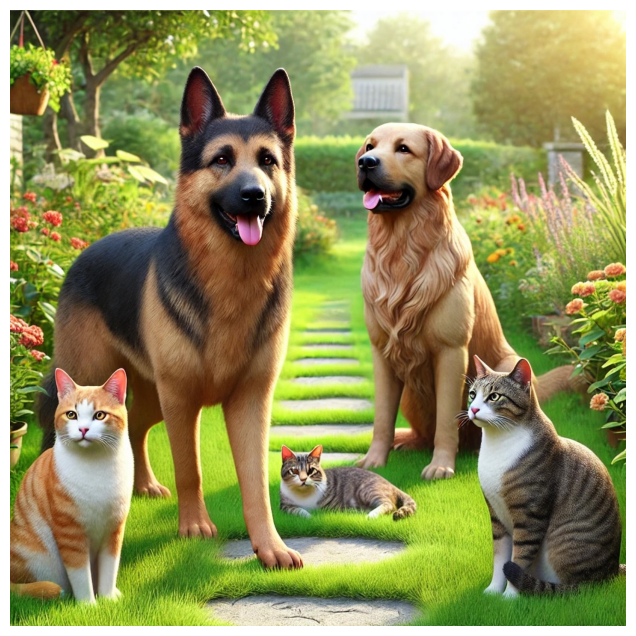

In [7]:
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(dogs_cats)
plt.axis('off')
#plt.title("Image")
plt.show()

In [8]:
task = '<CAPTION>'
images = dogs_cats
inputs = processor(text=task, images=images, return_tensors="pt").to(device)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    do_sample=False,
    num_beams=3
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task=task, image_size=(images.width, images.height))

print(parsed_answer)

{'<CAPTION>': 'A group of dogs and cats sitting in a garden.'}


## DETAILED_CAPTION

In [9]:
task = '<DETAILED_CAPTION>'
images = dogs_cats
inputs = processor(text=task, images=images, return_tensors="pt").to(device)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    do_sample=False,
    num_beams=3
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task=task, image_size=(images.width, images.height))

print(parsed_answer)

{'<DETAILED_CAPTION>': 'The image shows a group of cats and dogs sitting on top of a lush green field, surrounded by plants with flowers, trees, and a house in the background. The sky is visible above them, creating a peaceful atmosphere.'}


## Using a function

In [10]:
def run_example(task_prompt, text_input=None, image=None):
    start_time = time.perf_counter()  # Start timing
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )
    
    end_time = time.perf_counter()  # End timing
    elapsed_time = end_time - start_time  # Calculate elapsed time
    print(f" \n[INFO] ==> Florence-2-base ({task_prompt}), took {elapsed_time:.1f} seconds to execute.\n")
    
    return parsed_answer

## MORE_DETAILED_CAPTION

In [11]:
run_example(task_prompt='<MORE_DETAILED_CAPTION>',image=dogs_cats)

 
[INFO] ==> Florence-2-base (<MORE_DETAILED_CAPTION>), took 61.1 seconds to execute.



{'<MORE_DETAILED_CAPTION>': 'The image shows a group of four cats and a dog in a garden. The garden is filled with colorful flowers and plants, and there is a pathway leading up to a house in the background. The main focus of the image is a large German Shepherd dog standing on the left side of the garden, with its tongue hanging out and its mouth open, as if it is panting or panting. On the right side, there are two smaller cats, one orange and one gray, sitting on the grass. In the background, there is another golden retriever dog sitting and looking at the camera. The sky is blue and the sun is shining, creating a warm and inviting atmosphere.'}

In [12]:
run_example(task_prompt='<DETAILED_CAPTION>',image=table)

 
[INFO] ==> Florence-2-base (<DETAILED_CAPTION>), took 30.8 seconds to execute.



{'<DETAILED_CAPTION>': 'The image shows a wooden table with a bottle of wine and a glass of wine on it, surrounded by a variety of fruits such as apples, oranges, and grapes. In the background, there are chairs, plants, trees, and a house, all slightly blurred.'}

## OD - Object detection

In [13]:
task_prompt = '<OD>'
results = run_example(task_prompt,image=dogs_cats)
print(results)

 
[INFO] ==> Florence-2-base (<OD>), took 20.9 seconds to execute.

{'<OD>': {'bboxes': [[737.7920532226562, 571.904052734375, 1022.4640502929688, 980.4800415039062], [0.5120000243186951, 593.4080200195312, 211.4560089111328, 991.7440185546875], [445.9520263671875, 721.4080200195312, 680.4480590820312, 850.4320678710938], [39.42400360107422, 91.64800262451172, 491.0080261230469, 933.3760375976562], [570.8800048828125, 184.83201599121094, 974.3360595703125, 782.8480224609375]], 'labels': ['cat', 'cat', 'cat', 'dog', 'dog']}}


In [14]:
def plot_bbox(image, data):
   # Create a figure and axes
    #plt.figure(figsize=(8, 8))
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

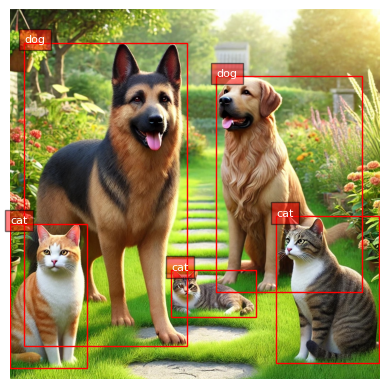

In [15]:
plot_bbox(dogs_cats, results['<OD>'])

 
[INFO] ==> Florence-2-base (<OD>), took 40.8 seconds to execute.



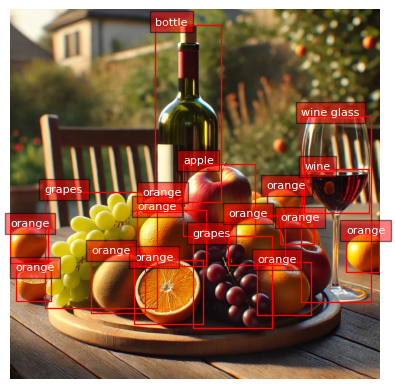

In [16]:
task_prompt = '<OD>'
results = run_example(task_prompt,image=table)
plot_bbox(table, results['<OD>'])

## DENSE_REGION_CAPTION

 
[INFO] ==> Florence-2-base (<DENSE_REGION_CAPTION>), took 41.7 seconds to execute.



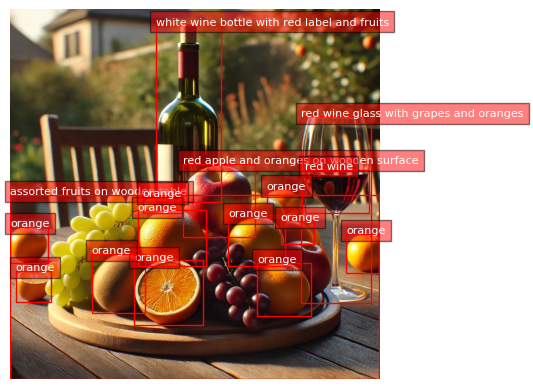

In [20]:
task_prompt = '<DENSE_REGION_CAPTION>'
results = run_example(task_prompt,image=table)
plot_bbox(table, results['<DENSE_REGION_CAPTION>'])

## CAPTION_TO_PHRASE_GROUNDING

 
[INFO] ==> Florence-2-base (<CAPTION_TO_PHRASE_GROUNDING>), took 17.7 seconds to execute.



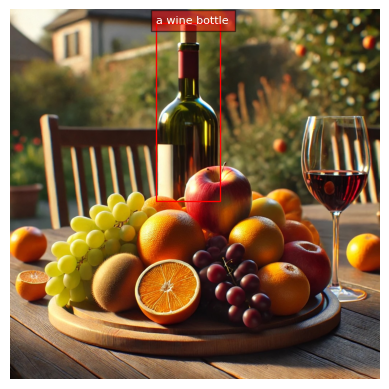

In [17]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="a wine bottle",image=table)
plot_bbox(table, results['<CAPTION_TO_PHRASE_GROUNDING>'])

 
[INFO] ==> Florence-2-base (<CAPTION_TO_PHRASE_GROUNDING>), took 15.7 seconds to execute.



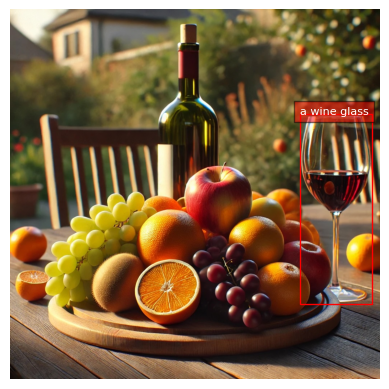

In [18]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="a wine glass",image=table)
plot_bbox(table, results['<CAPTION_TO_PHRASE_GROUNDING>'])

 
[INFO] ==> Florence-2-base (<CAPTION_TO_PHRASE_GROUNDING>), took 17.2 seconds to execute.



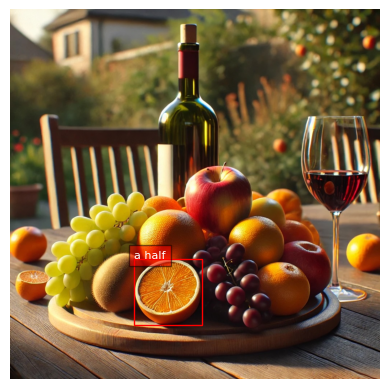

In [19]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="a half orange",image=table)
plot_bbox(table, results['<CAPTION_TO_PHRASE_GROUNDING>'])

## Segmentation

In [20]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'
results = run_example(task_prompt, text_input="a wine bottle",image=table)
results['<REFERRING_EXPRESSION_SEGMENTATION>']

 
[INFO] ==> Florence-2-base (<REFERRING_EXPRESSION_SEGMENTATION>), took 121.3 seconds to execute.



{'polygons': [[[471.5520324707031,
    46.592002868652344,
    472.5760192871094,
    44.544002532958984,
    474.6240234375,
    43.52000045776367,
    476.6720275878906,
    42.496002197265625,
    481.7920227050781,
    41.47200012207031,
    508.416015625,
    41.47200012207031,
    512.5120239257812,
    42.496002197265625,
    514.5599975585938,
    43.52000045776367,
    516.6080322265625,
    45.56800079345703,
    516.6080322265625,
    91.64800262451172,
    518.656005859375,
    93.69600677490234,
    520.7040405273438,
    93.69600677490234,
    522.7520141601562,
    95.74400329589844,
    523.7760009765625,
    97.79200744628906,
    523.7760009765625,
    108.0320053100586,
    522.7520141601562,
    109.0560073852539,
    521.72802734375,
    114.1760025024414,
    521.72802734375,
    230.91201782226562,
    522.7520141601562,
    235.0080108642578,
    523.7760009765625,
    238.08001708984375,
    524.800048828125,
    241.15200805664062,
    525.8240356445312,
    2

In [22]:
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
def draw_polygons(image, prediction, fill_mask=False):
    """
    Draws segmentation masks with polygons on an image.

    Parameters:
    - image_path: Path to the image file.
    - prediction: Dictionary containing 'polygons' and 'labels' keys.
                  'polygons' is a list of lists, each containing vertices of a polygon.
                  'labels' is a list of labels corresponding to each polygon.
    - fill_mask: Boolean indicating whether to fill the polygons with color.
    """
    # Load the image

    draw = ImageDraw.Draw(image)


    # Set up scale factor if needed (use 1 if not scaling)
    scale = 1

    # Iterate over polygons and labels
    for polygons, label in zip(prediction['polygons'], prediction['labels']):
        color = random.choice(colormap)
        fill_color = random.choice(colormap) if fill_mask else None

        for _polygon in polygons:
            _polygon = np.array(_polygon).reshape(-1, 2)
            if len(_polygon) < 3:
                print('Invalid polygon:', _polygon)
                continue

            _polygon = (_polygon * scale).reshape(-1).tolist()

            # Draw the polygon
            if fill_mask:
                draw.polygon(_polygon, outline=color, fill=fill_color)
            else:
                draw.polygon(_polygon, outline=color)

            # Draw the label text
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)
    
    # Save or display the image
    #image.show()  # Display the image
    display(image)

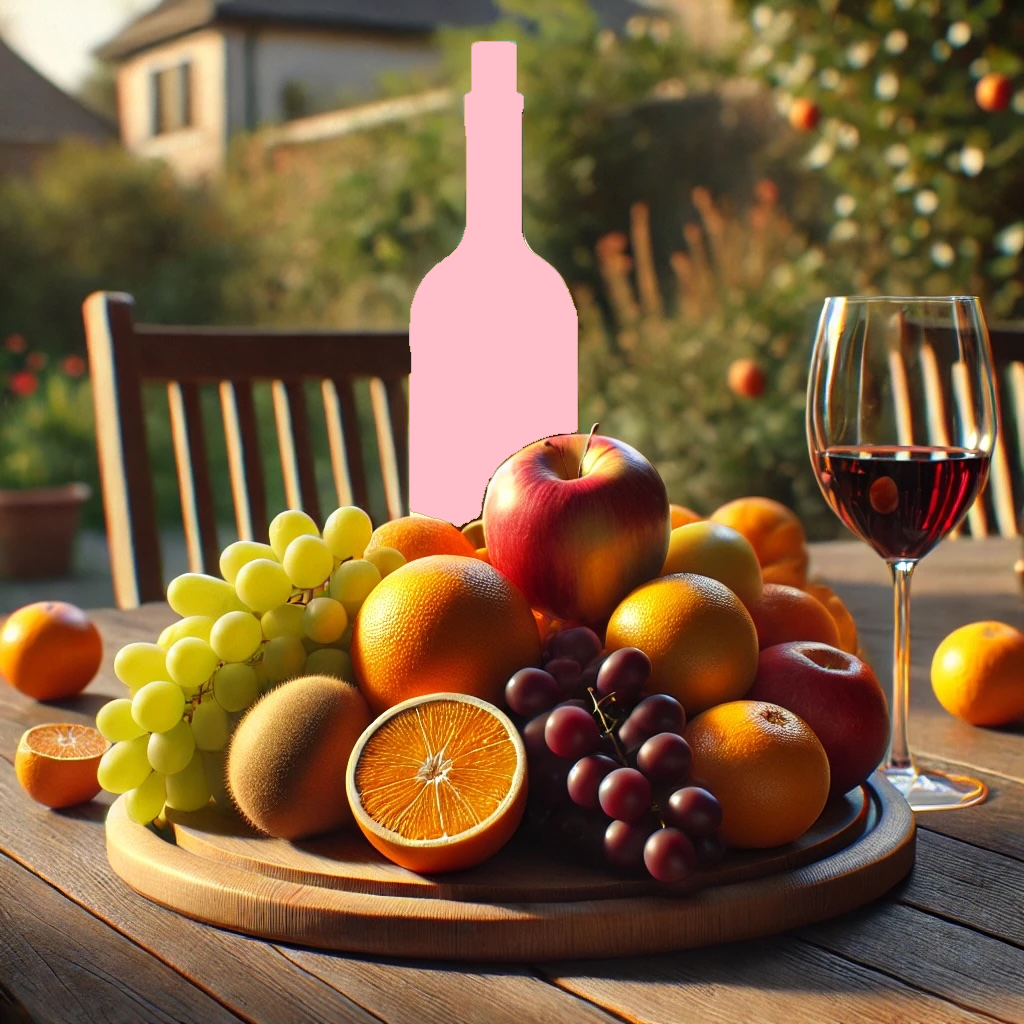

In [23]:
import copy
output_image = copy.deepcopy(table)
draw_polygons(output_image, results['<REFERRING_EXPRESSION_SEGMENTATION>'], fill_mask=True)

 
[INFO] ==> Florence-2-base (<REFERRING_EXPRESSION_SEGMENTATION>), took 207.0 seconds to execute.



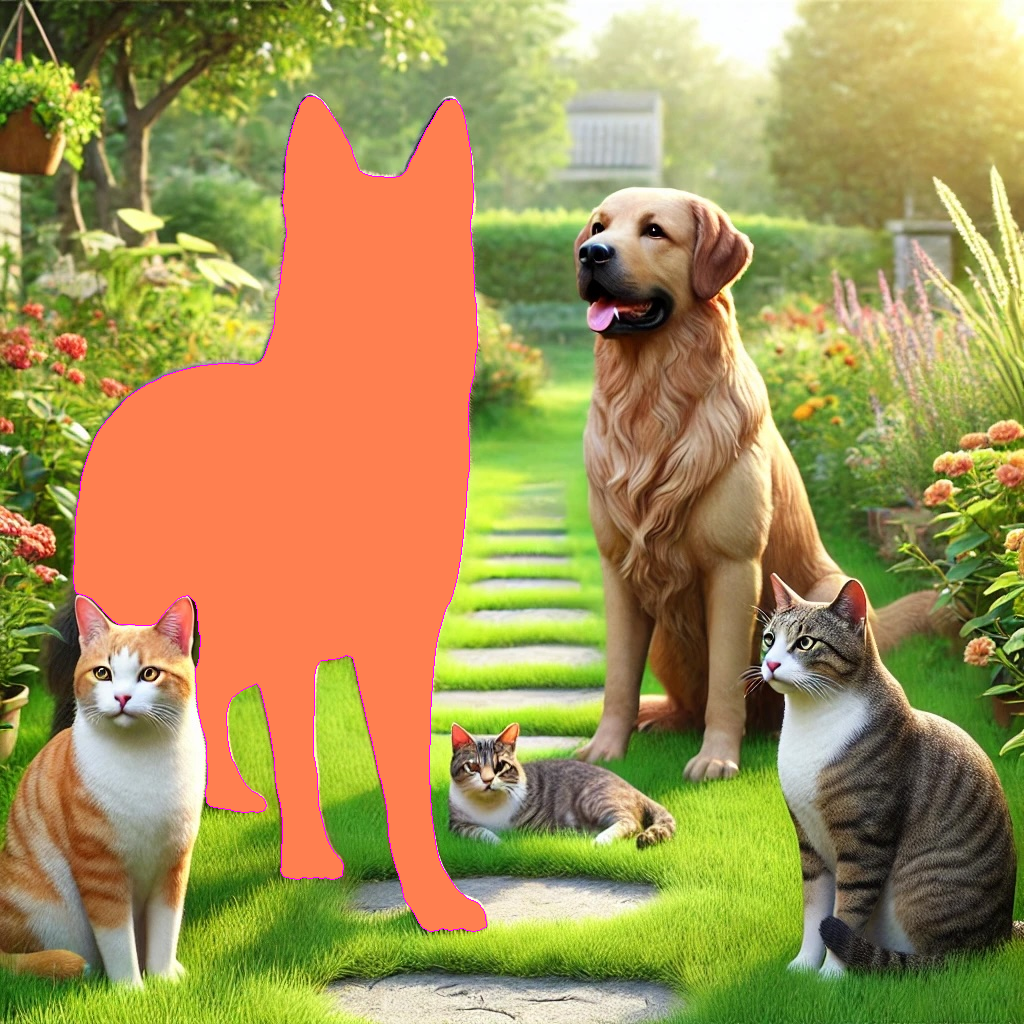

In [24]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'
results = run_example(task_prompt, text_input="a german sheppard",image=dogs_cats)
output_image = copy.deepcopy(dogs_cats)
draw_polygons(output_image, results['<REFERRING_EXPRESSION_SEGMENTATION>'], fill_mask=True)

## Text detection

In [25]:
flayer = Image.open('./images/embarcados.jpg')

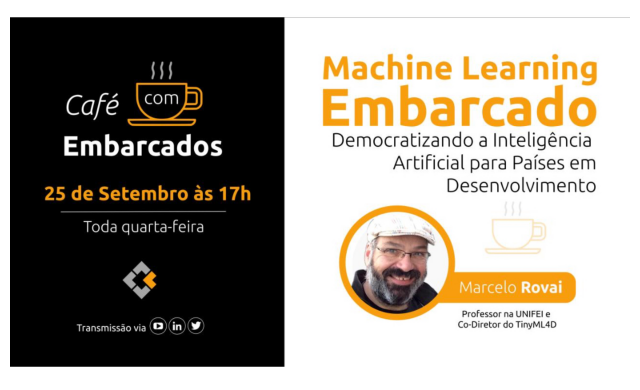

In [26]:
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(flayer)
plt.axis('off')
#plt.title("Image")
plt.show()

In [27]:
run_example(task_prompt='<MORE_DETAILED_CAPTION>',image=flayer)

 
[INFO] ==> Florence-2-base (<MORE_DETAILED_CAPTION>), took 85.2 seconds to execute.



{'<MORE_DETAILED_CAPTION>': 'The image is a promotional poster for an event called "Machine Learning Embarcados" hosted by Marcelo Roval. The poster has a black background with white text. On the left side of the poster, there is a logo of a coffee cup with the text "Café Com Embarcados" above it. Below the logo, it says "25 de Setembro as 17th" which translates to "25th of September as 17" in English. \n\nOn the right side, there are two smaller text boxes with the names of the participants and their names. The first text box reads "Democratizando a Inteligência Artificial para Paises em Desenvolvimento" and the second text box says "Toda quarta-feira" which is Portuguese for "Transmissão via in Portuguese".\n\nIn the center of the image, there has a photo of Marcelo, a man with a beard and glasses, smiling at the camera. He is wearing a white hard hat and a white shirt. The text boxes are in orange and yellow colors.'}

In [28]:
task_prompt = '<OCR>'
run_example(task_prompt,image=flayer)

 
[INFO] ==> Florence-2-base (<OCR>), took 37.7 seconds to execute.



{'<OCR>': 'Machine LearningCafécomEmbarcadoEmbarcadosDemocratizando a InteligênciaArtificial para Paises em25 de Setembro ás 17hDesenvolvimentoToda quarta-feiraMarcelo RovalProfessor na UNIFIEI eTransmissão viainCo-Director do TinyML4D'}

In [29]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt,image=flayer)
print(results)

 
[INFO] ==> Florence-2-base (<OCR_WITH_REGION>), took 75.5 seconds to execute.

{'<OCR_WITH_REGION>': {'quad_boxes': [[566.4375, 79.63199615478516, 1068.1875, 80.30400085449219, 1068.1875, 140.11199951171875, 566.4375, 136.0800018310547], [100.6875, 150.19200134277344, 201.9375, 150.19200134277344, 201.9375, 201.2639923095703, 100.6875, 201.2639923095703], [243.5625, 150.19200134277344, 308.8125, 150.19200134277344, 308.8125, 174.38400268554688, 243.5625, 174.38400268554688], [565.3125, 136.7519989013672, 1065.9375, 136.7519989013672, 1065.9375, 216.72000122070312, 565.3125, 216.72000122070312], [96.1875, 224.78399658203125, 387.5625, 224.78399658203125, 387.5625, 271.1520080566406, 96.1875, 271.1520080566406], [583.3125, 219.40798950195312, 1058.0625, 219.40798950195312, 1058.0625, 257.0400085449219, 583.3125, 257.0400085449219], [694.6875, 261.0719909667969, 1065.9375, 261.0719909667969, 1065.9375, 298.031982421875, 694.6875, 298.031982421875], [61.3125, 316.8479919433594, 439.3125,

In [30]:
def draw_ocr_bboxes(image, prediction):
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)
    display(image)

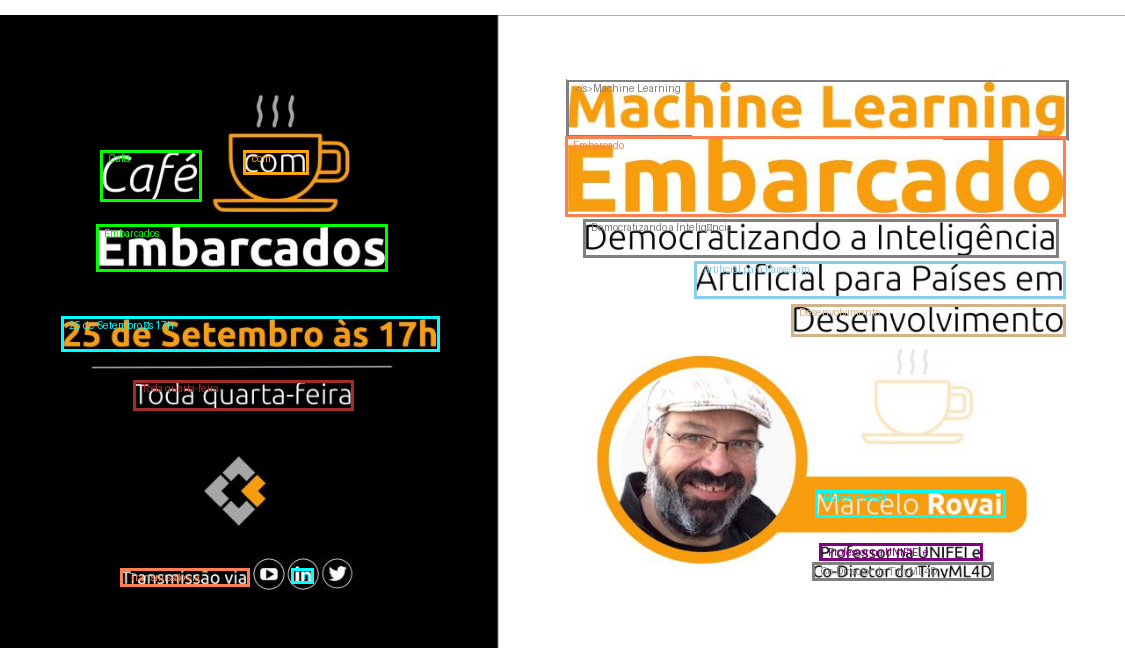

In [31]:
output_image = copy.deepcopy(flayer)
draw_ocr_bboxes(output_image, results['<OCR_WITH_REGION>'])

In [32]:
results['<OCR_WITH_REGION>']['labels']

['</s>Machine Learning',
 'Café',
 'com',
 'Embarcado',
 'Embarcados',
 'Democratizando a Inteligência',
 'Artificial para Paises em',
 '25 de Setembro ás 17h',
 'Desenvolvimento',
 'Toda quarta-feira',
 'Marcelo Roval',
 'Professor na UNIFIEI e',
 'Transmissão via',
 'in',
 'Co-Director do TinyML4D']

## Testing with video

In [48]:
# Starting timing
start_time = time.perf_counter()  # Start timing

# video config
video_path = './images/video.mp4'
output_path = './images/output.mp4'
cap = cv2.VideoCapture(video_path)

# Video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output file
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

prompt = "<OD>"
frame_count = 0

# Variables para almacenar las detecciones del último fotograma procesado
last_bboxes = []
last_labels = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Procesar solo cada 10 fotogramas
    if frame_count % 10 == 0:
        # Convertir el fotograma a una imagen PIL
        image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Procesar la imagen con Florence-2
        inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            num_beams=3,
            do_sample=False
        )
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
        parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

        # Actualizar las detecciones del último fotograma procesado
        last_bboxes = parsed_answer['<OD>']['bboxes']
        last_labels = parsed_answer['<OD>']['labels']

    # Dibujar las cajas de detección y etiquetas en el fotograma utilizando las últimas detecciones procesadas
    for bbox, label in zip(last_bboxes, last_labels):
        x1, y1, x2, y2 = [int(coord) for coord in bbox]
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Escribir el fotograma procesado en el archivo de salida
    out.write(frame)
    frame_count += 1

cap.release()
out.release()
print(f"Processed {frame_count // 10} frames and saved to {output_path}")

end_time = time.perf_counter()  # End timing
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f" \n[INFO] ==> Florence-2-base ({prompt}) on video, took {elapsed_time:.1f} seconds to execute.\n")

Processed 158 frames and saved to ./images/output.mp4
 
[INFO] ==> Florence-2-base (<OD>) on video, took 3529.4 seconds to execute.



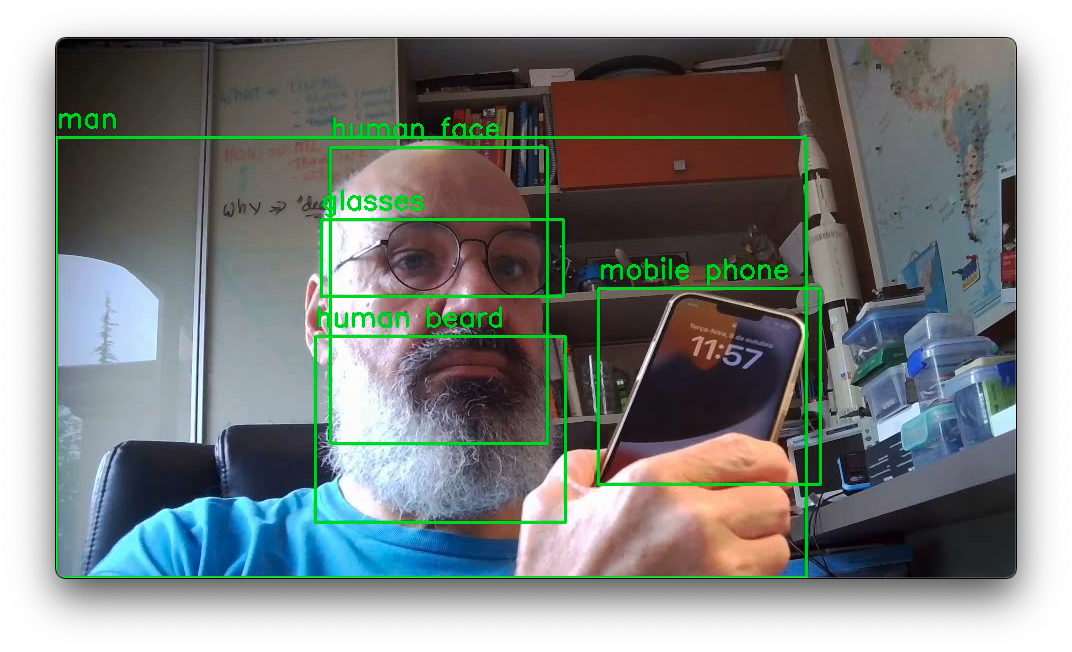

In [3]:
def draw_florence2_architecture():
    architecture = """
    +----------------------+
    |        Entrada       |
    +----------------------+
              |
        +-----+-----+
        |           |
        v           v
+---------------+  +-----------------+
| Imagem        |  | Prompt de Texto |
+---------------+  +-----------------+
        |                  |
        v                  v
+---------------+  +-----------------+
| Codificador   |  |   Tokenizador   |
|  de Imagem    |  |    de Texto     |
|   (DaViT)     |  |                 |
+---------------+  +-----------------+
        |                  |
        +--------+  +------+
                 |  |
                 v  v
    +---------------------------+
    |    Codificador            |
    |    Multi-modalidade       |
    |    (Transformer)          |
    +---------------------------+
                 |
                 v
    +---------------------------+
    |    Decodificador          |
    |    Multi-modalidade       |
    |    (Transformer)          |
    +---------------------------+
                 |
                 v
    +---------------------------+
    |    Saída                  |
    |    (Texto/Coordenadas)    |
    +---------------------------+
    """
    print(architecture)

# Chamada da função para exibir o diagrama
draw_florence2_architecture()


    +----------------------+
    |        Entrada       |
    +----------------------+
              |
        +-----+-----+
        |           |
        v           v
+---------------+  +-----------------+
| Imagem        |  | Prompt de Texto |
+---------------+  +-----------------+
        |                  |
        v                  v
+---------------+  +-----------------+
| Codificador   |  |   Tokenizador   |
|  de Imagem    |  |    de Texto     |
|   (DaViT)     |  |                 |
+---------------+  +-----------------+
        |                  |
        +--------+  +------+
                 |  |
                 v  v
    +---------------------------+
    |    Codificador            |
    |    Multi-modalidade       |
    |    (Transformer)          |
    +---------------------------+
                 |
                 v
    +---------------------------+
    |    Decodificador          |
    |    Multi-modalidade       |
    |    (Transformer)          |
    +---------